In [ ]:
import os
import gdown
import torch


folder_url = 'https://drive.google.com/drive/folders/15wXiQ_5a_FxwdwFEvKoZO4zILl7Wt9JD?usp=drive_link'
gdown.download_folder(folder_url, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1ZIpLbFzppycsElWZAvefzDTlKEC754KQ Aspect_acii.tif
Processing file 1dys_0SS_GkIde9kBiwZaiqaz8i8iHjXK Curvature_acii.tif
Processing file 155f44YV90ygQ899v62fHaxf3DMjTWzM8 DEM_acii.tif
Processing file 1NSJtwux1lbK1nnDJBZ8_ekISuLiEwa1F Flowaccumulation_acii.tif
Processing file 1U7rynNHpx55qHGajzSQIGEvS3SBLRR61 Flowdirection_acii.tif
Processing file 15CK86cr2caCstH13UiDG0GOZvPCLFAjL FOS_acii.tif
Processing file 1Y692dW7se-c2Jdgd-R3JmrC9PKUcw7yL FOS_Slope_ascii.tif
Processing file 1gKQSmXmhzVFEHRya-ZrKHjhmXgOKGglO initialization_point.tif
Processing file 18bKITnh-tx_Sb4YwP56cdD5I-2iQASyh Runout_output.tif
Processing file 1x3eclWI3rHnPhnBLBMeZd1XI1T6YHApK Slope_ascii.tif
Processing file 1agKEaECfrgVFL1Ot7YwdUCD5P08MWFXz StreamOrder.tif


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1ZIpLbFzppycsElWZAvefzDTlKEC754KQ
To: /content/Oelp/Aspect_acii.tif
100%|██████████| 28.3k/28.3k [00:00<00:00, 47.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dys_0SS_GkIde9kBiwZaiqaz8i8iHjXK
To: /content/Oelp/Curvature_acii.tif
100%|██████████| 28.3k/28.3k [00:00<00:00, 53.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=155f44YV90ygQ899v62fHaxf3DMjTWzM8
To: /content/Oelp/DEM_acii.tif
100%|██████████| 28.3k/28.3k [00:00<00:00, 43.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NSJtwux1lbK1nnDJBZ8_ekISuLiEwa1F
To: /content/Oelp/Flowaccumulation_acii.tif
100%|██████████| 28.3k/28.3k [00:00<00:00, 38.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U7rynNHpx55qHGajzSQIGEvS3SBLRR61
To: /content/Oelp/Flowdirection_acii.tif
100%|██████████| 28.3k/28.3k [00:00<00:00, 38.9MB/s]
Downloading..

['/content/Oelp/Aspect_acii.tif',
 '/content/Oelp/Curvature_acii.tif',
 '/content/Oelp/DEM_acii.tif',
 '/content/Oelp/Flowaccumulation_acii.tif',
 '/content/Oelp/Flowdirection_acii.tif',
 '/content/Oelp/FOS_acii.tif',
 '/content/Oelp/FOS_Slope_ascii.tif',
 '/content/Oelp/initialization_point.tif',
 '/content/Oelp/Runout_output.tif',
 '/content/Oelp/Slope_ascii.tif',
 '/content/Oelp/StreamOrder.tif']

# Image Preprocessing

## Converting Raster to png

In [ ]:
import os
import numpy as np
import cv2
from osgeo import gdal

def process_raster_to_png(input_path, output_path):
    """
    Reads a raster file, normalizes it to 0-255, and saves it as a PNG image.

    Args:
        input_path (str): Path to the input raster file.
        output_path (str): Path to save the output PNG file.
    """
    # Load the raster file
    raster = gdal.Open(input_path)
    if raster is None:
        print(f"Error: Could not open {input_path}")
        return

    array = raster.ReadAsArray()

    # Handle no data values
    no_data_value = raster.GetRasterBand(1).GetNoDataValue()
    if no_data_value is not None:
        array = np.ma.masked_equal(array, no_data_value).filled(0)  # Fill masked values with 0

    # Normalize to 0-255
    min_val = np.min(array)
    max_val = np.max(array)
    norm_array = ((array - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save as PNG
    cv2.imwrite(output_path, norm_array)
    print(f"Saved: {output_path}")

# Define input and output folders
input_folder = "/content/Oelp/"
output_folder = "/content/preprocessed_images/"  # Corrected path

# List of raster files
raster_files = [
    "Aspect_acii.tif", "Curvature_acii.tif", "DEM_acii.tif", "FOS_Slope_ascii.tif",
    "FOS_acii.tif", "Flowaccumulation_acii.tif", "Flowdirection_acii.tif",
    "Slope_ascii.tif", "StreamOrder.tif", "Runout_output.tif", "initialization_point.tif"
]

# Process each raster file
for raster_file in raster_files:
    input_path = os.path.join(input_folder, raster_file)
    output_filename = raster_file.replace(".tif", "_normalized.png")  # Ensure correct extension
    output_path = os.path.join(output_folder, output_filename)

    process_raster_to_png(input_path, output_path)


Saved: /content/preprocessed_images/Aspect_acii_normalized.png
Saved: /content/preprocessed_images/Curvature_acii_normalized.png
Saved: /content/preprocessed_images/DEM_acii_normalized.png
Saved: /content/preprocessed_images/FOS_Slope_ascii_normalized.png
Saved: /content/preprocessed_images/FOS_acii_normalized.png
Saved: /content/preprocessed_images/Flowaccumulation_acii_normalized.png
Saved: /content/preprocessed_images/Flowdirection_acii_normalized.png
Saved: /content/preprocessed_images/Slope_ascii_normalized.png
Saved: /content/preprocessed_images/StreamOrder_normalized.png
Saved: /content/preprocessed_images/Runout_output_normalized.png
Saved: /content/preprocessed_images/initialization_point_normalized.png


## Stacking parameters

In [ ]:
import cv2
import numpy as np

# Load and normalize features
def load_and_normalize(path):
    img = cv2.imread(path, 0)  # Load grayscale
    if img is None:
        raise ValueError(f"Error: Could not load {path}")
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)  # Resize before stacking
    return img.astype(np.float32) / 255.0  # Normalize to [0,1]

# Feature list
feature_paths = [
    "/content/preprocessed_images/DEM_acii_normalized.png",
    "/content/preprocessed_images/Slope_ascii_normalized.png",
    "/content/preprocessed_images/Aspect_acii_normalized.png",
    "/content/preprocessed_images/StreamOrder_normalized.png",
    "/content/preprocessed_images/FOS_acii_normalized.png",
    "/content/preprocessed_images/FOS_Slope_ascii_normalized.png",
    "/content/preprocessed_images/Flowaccumulation_acii_normalized.png",
    "/content/preprocessed_images/Flowdirection_acii_normalized.png",
    "/content/preprocessed_images/Curvature_acii_normalized.png",
    "/content/preprocessed_images/initialization_point_normalized.png"
]

# Load and preprocess all features
features = [load_and_normalize(path) for path in feature_paths]

# Stack features into (256, 256, 9)
input_tensor = np.stack(features, axis=-1)

# Load and preprocess label
label = cv2.imread("/content/preprocessed_images/Runout_output_normalized.png", 0)
if label is None:
    raise ValueError("Error: Could not load Runout_normalized.png")

label = cv2.resize(label, (256, 256), interpolation=cv2.INTER_NEAREST)

# Convert label to binary if needed (assuming landslide vs. non-landslide)
label = (label > 0).astype(np.uint8)  # Ensures labels are 0 or 1

# Save as numpy array
np.save("input_data.npy", input_tensor.astype(np.float32))  # Shape: (256, 256, 9)
np.save("labels.npy", label.astype(np.uint8))               # Shape: (256, 256)

print("✅ Data saved successfully! Shapes:")
print("input_data.npy:", input_tensor.shape)
print("labels.npy:", label.shape)


✅ Data saved successfully! Shapes:
input_data.npy: (256, 256, 10)
labels.npy: (256, 256)


# EDA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## Input Channel Visualisation

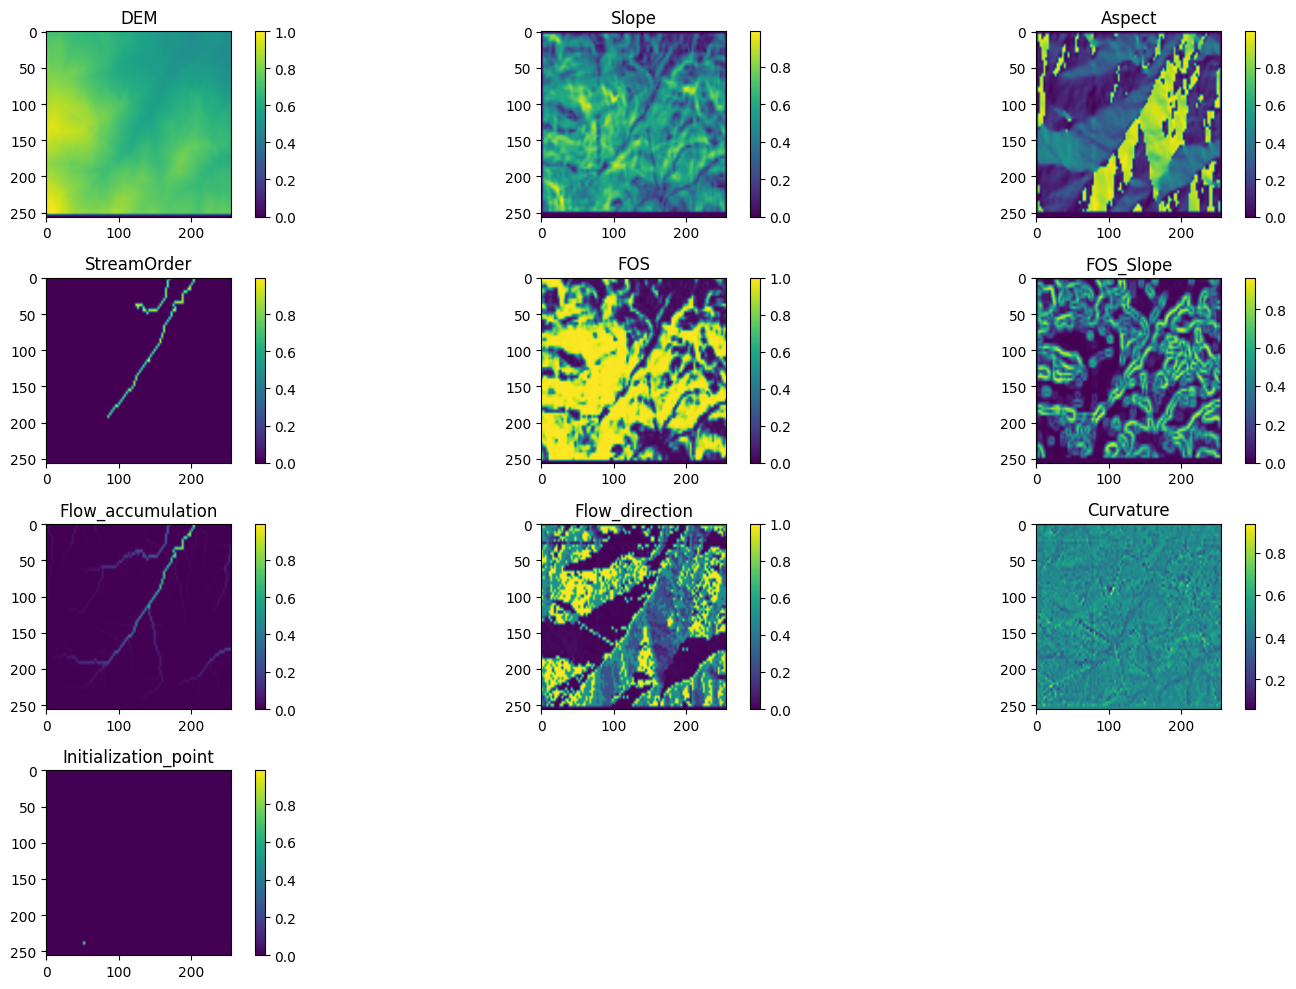

In [ ]:
plt.figure(figsize=(15, 10))
feature_names = ["DEM", "Slope", "Aspect", "StreamOrder", "FOS", "FOS_Slope", "Flow_accumulation", "Flow_direction", "Curvature","Initialization_point"]
for i, param in enumerate(feature_names):
    plt.subplot(4, 3, i+1)
    plt.imshow(input_tensor[:, :, i], cmap="viridis")
    plt.title(param)
    plt.colorbar()
plt.tight_layout()
plt.show()

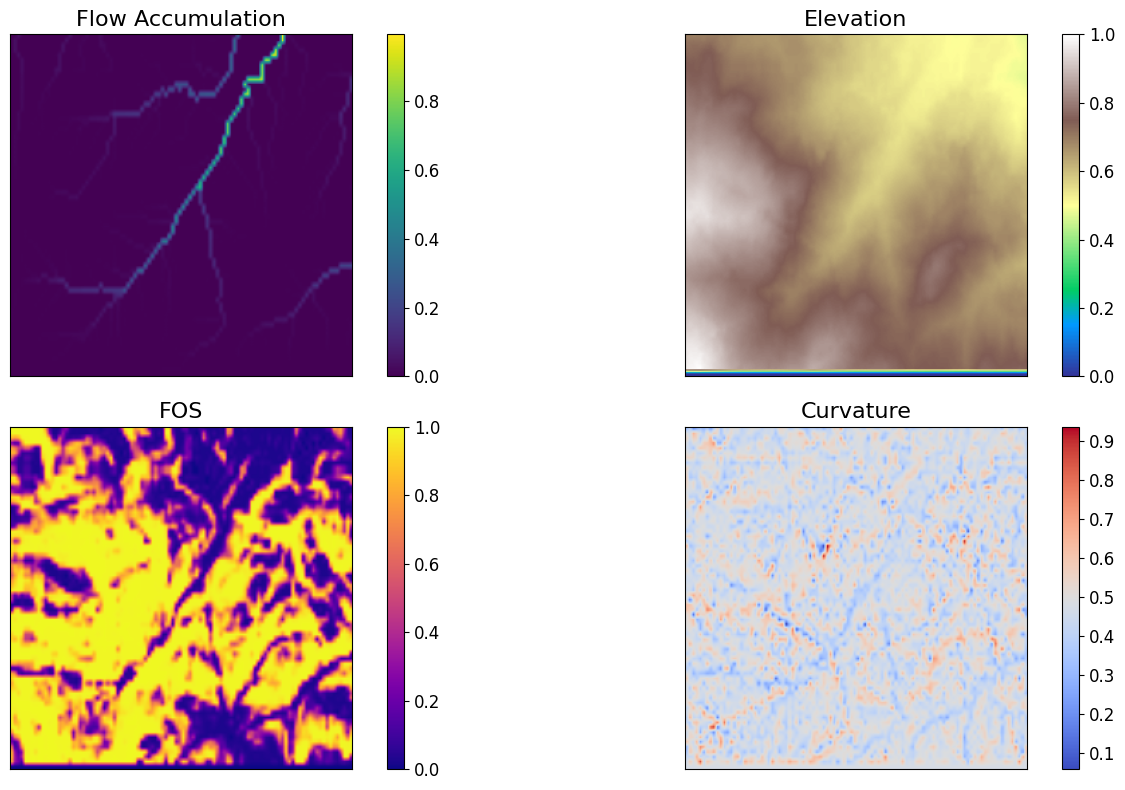

In [ ]:
import matplotlib.pyplot as plt

# (Internal name, Display title, Colormap)
selected_features = [("Flow_accumulation", "Flow Accumulation", "viridis"),
                     ("DEM", "Elevation", "terrain"),
                     ("FOS", "FOS", "plasma"),
                     ("Curvature", "Curvature", "coolwarm")]

plt.figure(figsize=(16, 8))
for i, (internal_name, display_title, cmap) in enumerate(selected_features):
    idx = feature_names.index(internal_name)
    plt.subplot(2, 2, i + 1)
    im = plt.imshow(input_tensor[:, :, idx], cmap=cmap)
    plt.title(display_title, fontsize=16)
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


## Class Distribution Analysis

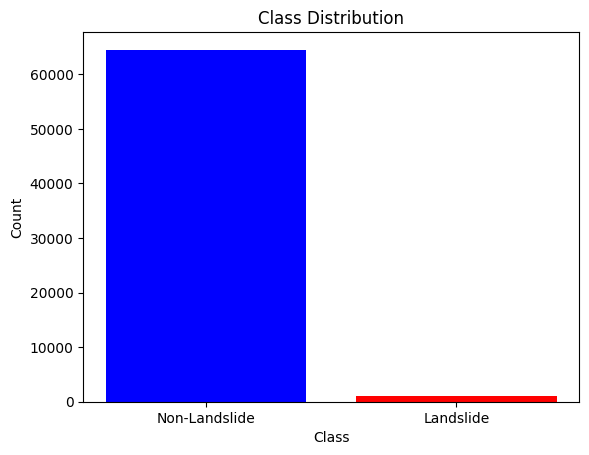

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class distribution

unique, counts = np.unique(label, return_counts=True)
plt.bar(unique, counts, color=['blue', 'red'])
plt.xticks(unique, ['Non-Landslide', 'Landslide'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Correlation Matrix

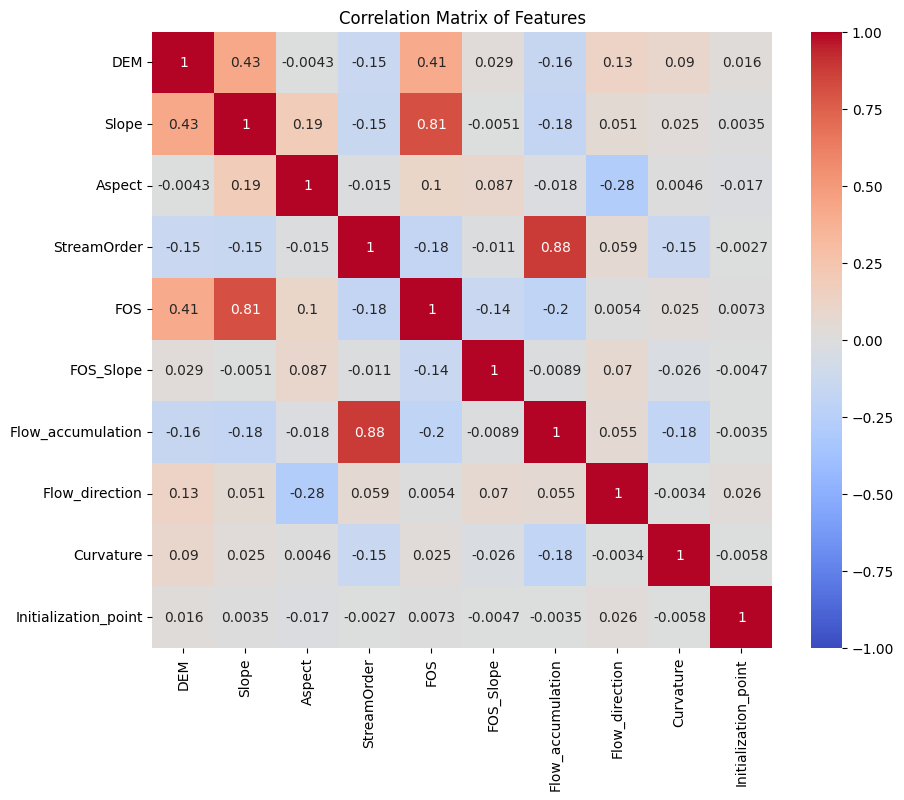

In [ ]:
import seaborn as sns
import pandas as pd

# Flatten the input tensor and create a DataFrame
flat_data = {feature_names[i]: input_tensor[:, :, i].flatten() for i in range(10)}
df = pd.DataFrame(flat_data)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

# Model Training

In [ ]:
import torch
import torch.nn as nn
import torchvision.models.segmentation as models
import numpy as np
import torch.nn.functional as F

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load DeepLabV3 model (pretrained)
model = models.deeplabv3_resnet101(pretrained=True)

# Modify input layer to accept 9 channels
model.backbone.conv1 = nn.Conv2d(10, 64, kernel_size=3, stride=1, padding=3, bias=False)

# Modify classifier to output 2 classes and upsample to (256, 256)
model.classifier = nn.Sequential(
    nn.Conv2d(2048, 256, kernel_size=3, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Conv2d(256, 2, kernel_size=1),
    nn.Upsample(size=(256, 256), mode="bilinear", align_corners=False)
)


# Freeze backbone except conv1
for param in model.backbone.parameters():
    param.requires_grad = False

for param in model.backbone.conv1.parameters():
    param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True

# Move model to GPU
model = model.to(device)

# Load data
inputs = np.load("input_data.npy")  # Shape: (256, 256, 9)
labels = np.load("labels.npy")      # Shape: (256, 256)

# Convert to PyTorch tensors
inputs = torch.tensor(inputs).float().permute(2, 0, 1).unsqueeze(0).to(device)  # Shape: (1, 9, 256, 256)
labels = torch.tensor(labels).long().unsqueeze(0).to(device)  # Shape: (1, 256, 256)


# Normalize input data to [-1, 1]
inputs = (inputs - 0.5) / 0.5

# Define loss function and optimizer

# Compute class weights based on pixel counts
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, weight=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.weight = weight

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.weight, reduction='none')
        pt = torch.exp(-ce_loss)  # Probabilities of correct class
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

# Update loss function
criterion = FocalLoss(alpha=0.20, gamma=3.0, weight=torch.tensor([1.0, 1.75]).to(device))


# Define weighted loss
# criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)['out']  # Shape: (1, 2, 256, 256)

    # Compute loss
    loss = criterion(outputs, labels)  # Remove batch dimension from labels
    print(f"Epoch {epoch+1}/{num_epochs}: Loss {loss.item()}")

    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    scheduler.step(loss)

torch.save(model.state_dict(), "deeplabv3_model.pth")


Epoch 1/200: Loss 0.012459434568881989
Epoch 2/200: Loss 0.23096394538879395
Epoch 3/200: Loss 0.14132121205329895
Epoch 4/200: Loss 0.07166872918605804
Epoch 5/200: Loss 0.03038906678557396
Epoch 6/200: Loss 0.009991349652409554
Epoch 7/200: Loss 0.004151822067797184
Epoch 8/200: Loss 0.0033554276451468468
Epoch 9/200: Loss 0.004047608934342861
Epoch 10/200: Loss 0.005310649983584881
Epoch 11/200: Loss 0.00563273299485445
Epoch 12/200: Loss 0.005359135568141937
Epoch 13/200: Loss 0.005032566376030445
Epoch 14/200: Loss 0.004704219289124012
Epoch 15/200: Loss 0.004093638621270657
Epoch 16/200: Loss 0.0033952007070183754
Epoch 17/200: Loss 0.002696826122701168
Epoch 18/200: Loss 0.0025811316445469856
Epoch 19/200: Loss 0.002113706199452281
Epoch 20/200: Loss 0.001961825415492058
Epoch 21/200: Loss 0.001989657524973154
Epoch 22/200: Loss 0.0019070005510002375
Epoch 23/200: Loss 0.0018753628246486187
Epoch 24/200: Loss 0.0017851670272648335
Epoch 25/200: Loss 0.0018485684413462877
Epoch 2

# Evaluation Metrics

In [ ]:
import os
import gdown
import torch


folder_url = 'https://drive.google.com/drive/folders/1Llo2qlE0DVjAjejyQuF5hL7w_mNEi4lm?usp=drive_link'
gdown.download_folder(folder_url, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1qR6Ot0w9yAjyaGNRDhu-fjMbvitAagsm aspect.tif
Processing file 1RLx8j20cXSqr7PTQB_l46mtCChZWqmLs curvature.tif
Processing file 1ckqn9c1d5XmJeZMbi2om_g0-s-uM6kOU dem.tif
Processing file 1qCA0pu20OULPEs08HMiS8MJ1O0l0XPot flowaccumulation.tif
Processing file 1GoORnPvQEd_lxg1Rmm_iS04CYhxaLMuy flowdirection.tif
Processing file 1dEqrwNdmZlhn55w0HZTj2m0gnGqLkp5r fos.tif
Processing file 1ZKiXdHuYJ_8zDVpMfYSAPIGBDyrRXeMX fosslope.tif
Processing file 19SKV4IjexW9V6LFRiMJ_29l_dhZga21t lulc.tif
Processing file 15cqZRVpgfMJWAqgPdJAum9sU1EaJE5bB ndvi.tif
Processing file 1H1vdopGYlB5sPKVuxiEzasFfuyIO2-8K origin.tif
Processing file 1NJeVenmL9LjMKS0ovF8RNk90XxmtIck1 runoutpath.tif
Processing file 1HmPf-NsbXw1IdVfe31Qu5mPnNFSlsKux slope.tif
Processing file 1BuI7P3lyfJlmPzTzR7Wl9Hdeu7g1_aZK streamorder.tif
Processing file 1HBPzmCyICRrSjv8ny60OauwCmv3fo3r4 twi.tif


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1qR6Ot0w9yAjyaGNRDhu-fjMbvitAagsm
To: /content/case_177/aspect.tif
100%|██████████| 17.3k/17.3k [00:00<00:00, 32.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RLx8j20cXSqr7PTQB_l46mtCChZWqmLs
To: /content/case_177/curvature.tif
100%|██████████| 17.3k/17.3k [00:00<00:00, 31.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ckqn9c1d5XmJeZMbi2om_g0-s-uM6kOU
To: /content/case_177/dem.tif
100%|██████████| 17.3k/17.3k [00:00<00:00, 36.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qCA0pu20OULPEs08HMiS8MJ1O0l0XPot
To: /content/case_177/flowaccumulation.tif
100%|██████████| 17.3k/17.3k [00:00<00:00, 36.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GoORnPvQEd_lxg1Rmm_iS04CYhxaLMuy
To: /content/case_177/flowdirection.tif
100%|██████████| 17.3k/17.3k [00:00<00:00, 33.9MB/s]
Downloading...
Fro

['/content/case_177/aspect.tif',
 '/content/case_177/curvature.tif',
 '/content/case_177/dem.tif',
 '/content/case_177/flowaccumulation.tif',
 '/content/case_177/flowdirection.tif',
 '/content/case_177/fos.tif',
 '/content/case_177/fosslope.tif',
 '/content/case_177/lulc.tif',
 '/content/case_177/ndvi.tif',
 '/content/case_177/origin.tif',
 '/content/case_177/runoutpath.tif',
 '/content/case_177/slope.tif',
 '/content/case_177/streamorder.tif',
 '/content/case_177/twi.tif']

In [ ]:
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torchvision.models.segmentation as models
from osgeo import gdal

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to process raster to PNG (same as training)
def process_raster_to_png(input_path, output_path):
    """
    Reads a raster file, normalizes it to 0-255, and saves it as a PNG image.
    """
    raster = gdal.Open(input_path)
    if raster is None:
        print(f"Error: Could not open {input_path}")
        return False

    array = raster.ReadAsArray()
    no_data_value = raster.GetRasterBand(1).GetNoDataValue()
    if no_data_value is not None:
        array = np.ma.masked_equal(array, no_data_value).filled(0)

    min_val = np.min(array)
    max_val = np.max(array)
    if max_val == min_val:  # Avoid division by zero
        norm_array = np.zeros_like(array, dtype=np.uint8)
    else:
        norm_array = ((array - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, norm_array)
    print(f"Saved: {output_path}")
    return True

# Function to load and normalize PNG images
def load_and_normalize(path):
    img = cv2.imread(path, 0)  # Load grayscale
    if img is None:
        raise ValueError(f"Error: Could not load {path}")
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)
    return img.astype(np.float32) / 255.0

# Function to compute IoU (Intersection over Union)
def compute_iou(pred, target):
    pred = pred.astype(bool)
    target = target.astype(bool)
    intersection = np.logical_and(pred, target).sum()
    union = np.logical_or(pred, target).sum()
    if union == 0:
        return 1.0 if intersection == 0 else 0.0
    return intersection / union

# Define paths
test_case = "case_177"  # Change to desired case folder (e.g., case_255)
input_folder = f"/content/{test_case}/"
output_folder = f"/content/{test_case}_preprocessed/"
prediction_output = f"/content/{test_case}_prediction.png"

# List of raster files (same as training, excluding Runout_output.tif for features)
raster_files = [
    "aspect.tif", "curvature.tif", "dem.tif", "fosslope.tif",
    "fos.tif", "flowaccumulation.tif", "flowdirection.tif",
    "slope.tif", "streamorder.tif", "origin.tif"
]

# Process test rasters to PNG
feature_paths = []
for raster_file in raster_files:
    input_path = os.path.join(input_folder, raster_file)
    output_filename = raster_file.replace(".tif", "_normalized.png")
    output_path = os.path.join(output_folder, output_filename)
    if process_raster_to_png(input_path, output_path):
        feature_paths.append(output_path)

# Process ground truth (if available)
ground_truth_path = os.path.join(input_folder, "runoutpath.tif")
ground_truth_png = os.path.join(output_folder, "63_normalized.png")
ground_truth_available = process_raster_to_png(ground_truth_path, ground_truth_png)

# Load and preprocess features
features = [load_and_normalize(path) for path in feature_paths]
input_tensor = np.stack(features, axis=-1)  # Shape: (256, 256, 9)

# Convert to PyTorch tensor
inputs = torch.tensor(input_tensor).float().permute(2, 0, 1).unsqueeze(0).to(device)  # Shape: (1, 9, 256, 256)
inputs = (inputs - 0.5) / 0.5  # Normalize to [-1, 1]

# Load model
model = models.deeplabv3_resnet101(pretrained=False)
model.backbone.conv1 = nn.Conv2d(10, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.classifier = nn.Sequential(
    nn.Conv2d(2048, 256, kernel_size=3, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.Conv2d(256, 2, kernel_size=1),
    nn.Upsample(size=(256, 256), mode="bilinear", align_corners=False)
)
model = model.to(device)

# Load trained weights (assuming saved during training)
# model.load_state_dict(torch.load("deeplabv3_model.pth", map_location=device))
model.eval()

# Run inference
with torch.no_grad():
    outputs = model(inputs)['out']  # Shape: (1, 2, 256, 256)
    predictions = torch.argmax(outputs, dim=1).squeeze(0).cpu().numpy()  # Shape: (256, 256)

# Save prediction as PNG
predictions_png = (predictions * 255).astype(np.uint8)  # Convert to 0-255 for visualization
cv2.imwrite(prediction_output, predictions_png)
print(f"Saved prediction: {prediction_output}")

# Evaluate if ground truth is available
if ground_truth_available:
    ground_truth = cv2.imread(ground_truth_png, 0)
    if ground_truth is not None:
        ground_truth = cv2.resize(ground_truth, (256, 256), interpolation=cv2.INTER_NEAREST)
        ground_truth = (ground_truth > 0).astype(np.uint8)  # Binary labels
        iou = compute_iou(predictions, ground_truth)
        print(f"IoU for {test_case}: {iou:.4f}")
    else:
        print("Warning: Could not load ground truth PNG for evaluation.")

print(f"✅ Testing completed for {test_case}!")

Saved: /content/case_177_preprocessed/aspect_normalized.png
Saved: /content/case_177_preprocessed/curvature_normalized.png
Saved: /content/case_177_preprocessed/dem_normalized.png
Saved: /content/case_177_preprocessed/fosslope_normalized.png
Saved: /content/case_177_preprocessed/fos_normalized.png
Saved: /content/case_177_preprocessed/flowaccumulation_normalized.png
Saved: /content/case_177_preprocessed/flowdirection_normalized.png
Saved: /content/case_177_preprocessed/slope_normalized.png
Saved: /content/case_177_preprocessed/streamorder_normalized.png
Saved: /content/case_177_preprocessed/origin_normalized.png
Saved: /content/case_177_preprocessed/63_normalized.png


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 183MB/s]


Saved prediction: /content/case_177_prediction.png
IoU for case_177: 0.0164
✅ Testing completed for case_177!


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import torch

# Clear the GPU memory cache
torch.cuda.empty_cache()

## Prediction Vs Ground Truth

In [ ]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    outputs = model(inputs)['out']
    preds = torch.argmax(outputs, dim=1).cpu().numpy()[0]  # Convert to NumPy

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Ground Truth")
plt.imshow(labels.cpu().numpy()[0], cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(preds, cmap="gray")

plt.show()


NameError: name 'model' is not defined

## Jaccard Index (IOU Score)

In [ ]:
from torchmetrics.classification import JaccardIndex

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    # Forward pass
    outputs = model(inputs)['out']  # Shape: (1, 2, 256, 256)

    # Get predicted class indices
    preds = torch.argmax(outputs, dim=1)  # Shape: (1, 256, 256)

    # Remove the batch dimension from preds and labels
    preds = preds.squeeze(0)  # Shape: (256, 256)
    labels = labels.squeeze(0)  # Shape: (256, 256)

    # Initialize the JaccardIndex metric
    iou = JaccardIndex(task="multiclass", num_classes=2).to(device)
    iou_landslide = JaccardIndex(task="binary", num_classes=2).to(device)
    iou_non_landslide = JaccardIndex(task="binary", num_classes=2).to(device)


    # Compute IoU
    print("IoU Score:", iou(preds, labels))
    print("IoU for Landslide Class:", iou_landslide(preds == 1, labels == 1))
    print("IoU for Non-Landslide Class:", iou_non_landslide(preds == 0, labels == 0))

IoU Score: tensor(0.9073, device='cuda:0')
IoU for Landslide Class: tensor(0.8180, device='cuda:0')
IoU for Non-Landslide Class: tensor(0.9965, device='cuda:0')


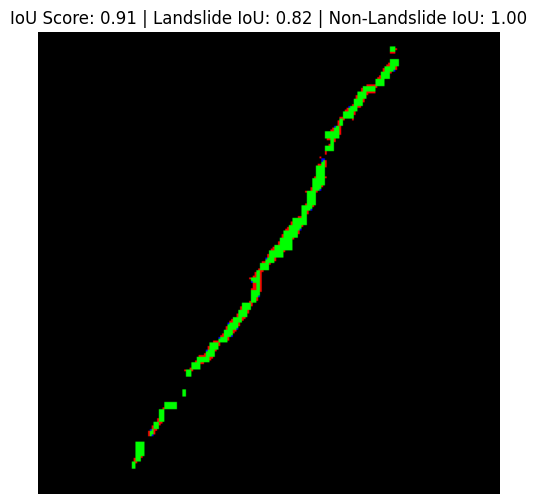

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert tensors to numpy arrays for visualization
preds_np = preds.cpu().numpy()
labels_np = labels.cpu().numpy()

# Create visual overlay
visual = np.zeros((256, 256, 3), dtype=np.uint8)

# Correct predictions (True Positive)
visual[(labels_np == 1) & (preds_np == 1)] = [0, 255, 0]  # Green

# False Positive (Incorrect landslide prediction)
visual[(labels_np == 0) & (preds_np == 1)] = [255, 0, 0]  # Red

# False Negative (Missed landslide regions)
visual[(labels_np == 1) & (preds_np == 0)] = [0, 0, 255]  # Blue

# Display visualization
plt.figure(figsize=(6, 6))
plt.imshow(visual)
plt.title(f"IoU Score: {iou(preds, labels):.2f} | Landslide IoU: {iou_landslide(preds == 1, labels == 1):.2f} | Non-Landslide IoU: {iou_non_landslide(preds == 0, labels == 0):.2f}")
plt.axis("off")
plt.show()


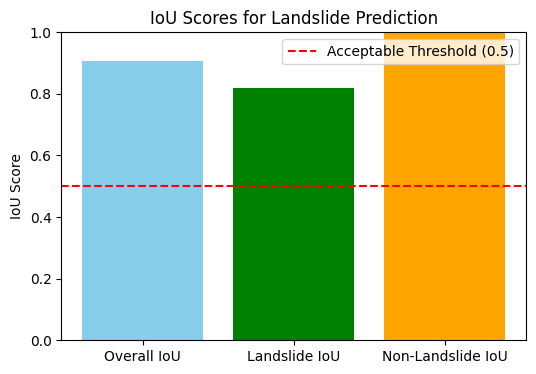

In [ ]:
import matplotlib.pyplot as plt

# IoU scores
iou_scores = [
    iou(preds, labels).item(),
    iou_landslide(preds == 1, labels == 1).item(),
    iou_non_landslide(preds == 0, labels == 0).item()
]

# Bar chart visualization
plt.figure(figsize=(6, 4))
plt.bar(['Overall IoU', 'Landslide IoU', 'Non-Landslide IoU'], iou_scores, color=['skyblue', 'green', 'orange'])

plt.title("IoU Scores for Landslide Prediction")
plt.ylabel("IoU Score")
plt.ylim(0, 1)
plt.axhline(0.5, color='red', linestyle='--', label='Acceptable Threshold (0.5)')
plt.legend()
plt.show()


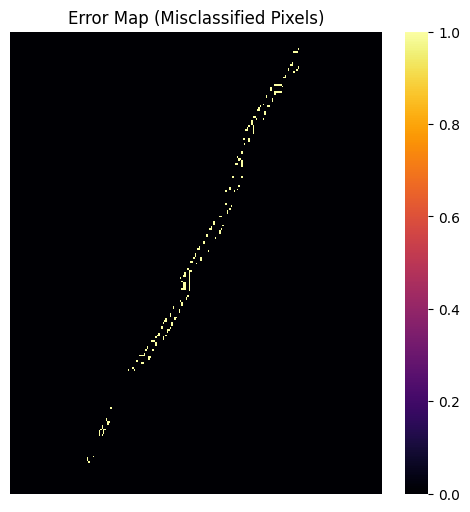

In [ ]:
import seaborn as sns

# Misclassified pixels (overlay of FP and FN)
error_map = (labels_np != preds_np).astype(np.float32)

plt.figure(figsize=(6, 6))
sns.heatmap(error_map, cmap='inferno', cbar=True)
plt.title('Error Map (Misclassified Pixels)')
plt.axis("off")
plt.show()


## Confusion Matrix

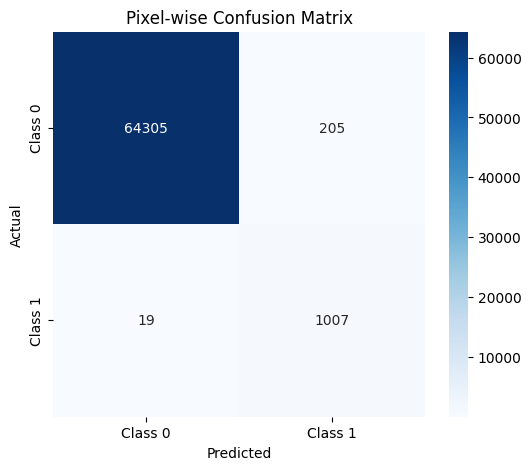

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(labels.cpu().numpy().flatten(), preds.cpu().numpy().flatten())
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Pixel-wise Confusion Matrix")
plt.show()


## Confidence Map

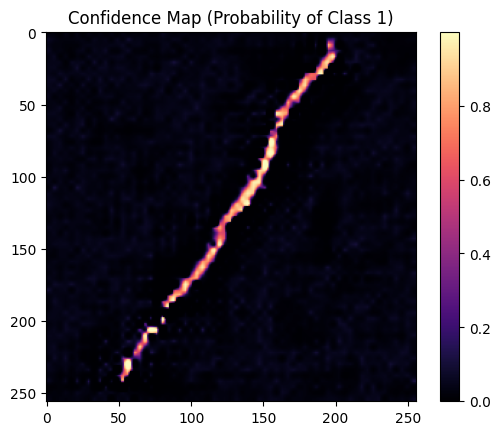

In [ ]:
confidence = torch.softmax(outputs, dim=1)[0, 1].cpu().numpy()  # Probability of Class 1
plt.imshow(confidence, cmap="magma")
plt.title("Confidence Map (Probability of Class 1)")
plt.colorbar()
plt.show()


# SHAP Analysis

In [ ]:
import shap
torch.cuda.empty_cache()
model.eval()

# Step 1: Find a pixel where the model predicts landslide (class 1)
with torch.no_grad():
    outputs = model(inputs)['out']  # Shape: (1, 2, 256, 256)
    preds = torch.argmax(outputs, dim=1)[0]  # Shape: (256, 256)
    landslide_pixels = (preds == 1).nonzero(as_tuple=False)  # Get coordinates of landslide predictions

    if landslide_pixels.numel() > 0:
        y, x = landslide_pixels[0].tolist()  # Take the first landslide pixel
    else:
        raise ValueError("No landslide pixels predicted by the model")

print(f"Explaining prediction for pixel at ({y}, {x})")

# Step 2: Define a wrapper model to output only the prediction for the selected pixel
class PixelModel(nn.Module):
    def __init__(self, base_model, y, x):
        super(PixelModel, self).__init__()
        self.base_model = base_model
        self.y = y
        self.x = x

    def forward(self, input_tensor):
        output = self.base_model(input_tensor)['out']  # Shape: (1, 2, 256, 256)
        pixel_output = output[:, :, self.y, self.x]  # Shape: (1, 2)
        return pixel_output

# Create an instance of the wrapper model
pixel_model = PixelModel(model, y, x).to(device)

# Step 3: Initialize SHAP GradientExplainer
# Use the input as the background sample
explainer = shap.GradientExplainer(pixel_model, inputs)

# Step 4: Compute SHAP values for the landslide class (target=1)
# Reduce nsamples to 50 to manage computation time/memory (adjust as needed)
shap_values = explainer.shap_values(inputs, nsamples=50)

# shap_values is a list with one element of shape [1, 10, 256, 256] (for one output class)
shap_values = shap_values[0]  # Extract the array: [1, 10, 256, 256]
shap_values = shap_values[0]  # Take the first (and only) sample: [10, 256, 256]

# Step 5: Prepare input data for visualization
input_np = inputs.cpu().numpy()[0]  # Shape: [10, 256, 256]

# Optional: Normalize each channel to [0, 1] for better visualization
def normalize_channel(channel):
    min_val = channel.min()
    max_val = channel.max()
    if max_val > min_val:
        return (channel - min_val) / (max_val - min_val)
    return channel

input_np_norm = np.array([normalize_channel(input_np[i]) for i in range(10)])  # Shape: [10, 256, 256]

# Step 6: Visualize SHAP values using image_plot
# Wrap shap_values in a list since image_plot expects a list of explanations
shap.image_plot([shap_values], input_np_norm)

Explaining prediction for pixel at (8, 195)


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

In [ ]:

model.eval()

# Step 1: Find a pixel where the model predicts landslide (class 1)
with torch.no_grad():
    outputs = model(inputs)['out']  # Shape: (1, 2, 256, 256)
    preds = torch.argmax(outputs, dim=1)[0]  # Shape: (256, 256)
    landslide_pixels = (preds == 1).nonzero(as_tuple=False)  # Get coordinates of landslide predictions

    if landslide_pixels.numel() > 0:
        y, x = landslide_pixels[0].tolist()  # Take the first landslide pixel
    else:
        raise ValueError("No landslide pixels predicted by the model")

print(f"Explaining prediction for pixel at ({y}, {x})")

# Step 2: Define a wrapper model to output only the prediction for the selected pixel
class PixelModel(nn.Module):
    def __init__(self, base_model, y, x):
        super(PixelModel, self).__init__()
        self.base_model = base_model
        self.y = y
        self.x = x

    def forward(self, input_tensor):
        output = self.base_model(input_tensor)['out']  # Shape: (1, 2, 256, 256)
        pixel_output = output[:, :, self.y, self.x]  # Shape: (1, 2)
        return pixel_output

# Create an instance of the wrapper model
pixel_model = PixelModel(model, y, x).to(device)

# Step 3: Initialize SHAP GradientExplainer
explainer = shap.GradientExplainer(pixel_model, inputs)

# Step 4: Compute SHAP values for all outputs (both classes)
shap_values = explainer.shap_values(inputs, nsamples=50)

# Step 5: Extract SHAP values for class 1 (landslide)
# shap_values[1] corresponds to class 1, shape: [1, 10, 256, 256]
shap_values_class_1 = shap_values[1][0]  # Shape: [10, 256, 256]

# Step 6: Extract SHAP values for the selected pixel (y, x)
shap_at_pixel = shap_values_class_1[:, y, x]  # Shape: [10]

# Step 7: Define feature names (replace with actual names if known)
feature_names = [f"Feature {i+1}" for i in range(10)]

# Step 8: Plot the feature importance as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, shap_at_pixel, color='skyblue')
plt.xlabel("SHAP Value")
plt.title(f"Feature Importance for Landslide Prediction at Pixel ({y}, {x})")
plt.gca().invert_yaxis()  # Optional: puts the most important feature at the top
plt.show()

# Optional: Print SHAP values for inspection
print("SHAP values for pixel:", shap_at_pixel)

Explaining prediction for pixel at (8, 195)


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

In [ ]:
! pip install shap

In [ ]:
model.eval()

# Step 2: Load and preprocess input data
inputs = np.load("input_data.npy")  # Shape: (256, 256, 10)
inputs = torch.tensor(inputs).float().permute(2, 0, 1).unsqueeze(0).to(device)  # Shape: (1, 10, 256, 256)

# Normalize input data to [-1, 1] (as per your previous preprocessing)
inputs = (inputs - 0.5) / 0.5

# Clear GPU memory cache to avoid memory issues
torch.cuda.empty_cache()

# Step 3: Find a pixel where the model predicts landslide (class 1)
with torch.no_grad():
    outputs = model(inputs)['out']  # Shape: (1, 2, 256, 256)
    preds = torch.argmax(outputs, dim=1)[0]  # Shape: (256, 256)
    landslide_pixels = (preds == 1).nonzero(as_tuple=False)  # Get coordinates of landslide predictions

    if landslide_pixels.numel() > 0:
        y, x = landslide_pixels[0].tolist()  # Take the first landslide pixel
    else:
        # If no landslide pixels are predicted, manually set to (8, 195) or another pixel
        y, x = 8, 195
        print("No landslide pixels predicted; using default pixel (8, 195)")

print(f"Explaining prediction for pixel at ({y}, {x})")

# Step 4: Define a wrapper model to output only the prediction for the selected pixel
class PixelModel(nn.Module):
    def __init__(self, base_model, y, x):
        super(PixelModel, self).__init__()
        self.base_model = base_model
        self.y = y
        self.x = x

    def forward(self, input_tensor):
        output = self.base_model(input_tensor)['out']  # Shape: (1, 2, 256, 256)
        pixel_output = output[:, :, self.y, self.x]  # Shape: (1, 2)
        return pixel_output.clone()  # Clone to avoid in-place modification issues

# Create an instance of the wrapper model
pixel_model = PixelModel(model, y, x).to(device)

# Step 5: Initialize SHAP GradientExplainer
explainer = shap.GradientExplainer(pixel_model, inputs)

# Step 6: Compute SHAP values for all outputs (both classes)
shap_values = explainer.shap_values(inputs, nsamples=50)

# Step 7: Extract SHAP values for class 1 (landslide)
# shap_values[1] corresponds to class 1, shape: [1, 10, 256, 256]
shap_values_class_1 = shap_values[1][0]  # Shape: [10, 256, 256]

# Step 8: Extract SHAP values for the selected pixel (y, x)
shap_at_pixel = shap_values_class_1[:, y, x]  # Shape: [10]

# Step 9: Define feature names (replace with actual names if known)
feature_names = [f"Feature {i+1}" for i in range(10)]
# Example with meaningful names (uncomment if applicable):
# feature_names = ["Elevation", "Slope", "Aspect", "Curvature", "Soil Moisture",
#                  "Vegetation", "Rainfall", "Distance to Roads", "Lithology", "Land Use"]

# Step 10: Plot the feature importance as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, shap_at_pixel, color='skyblue')
plt.xlabel("SHAP Value")
plt.title(f"Feature Importance for Landslide Prediction at Pixel ({y}, {x})")
plt.gca().invert_yaxis()  # Optional: puts the most important feature at the top
plt.show()

# Optional: Print SHAP values for inspection
print("SHAP values for pixel:", shap_at_pixel)

Explaining prediction for pixel at (8, 195)


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

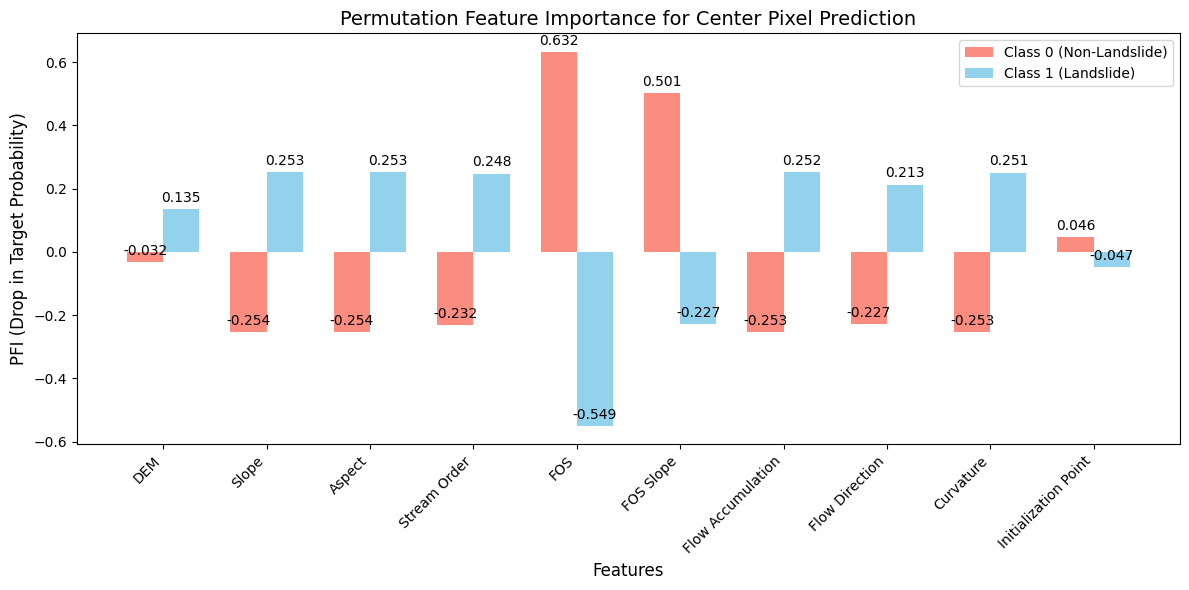

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def permutation_feature_importance(model, input_image, class_idx, target_pixel=(128, 128), num_repeats=5):
    """
    Compute permutation feature importance (PFI) for a specific class.

    Args:
        model: PyTorch segmentation model.
        input_image: Input image tensor of shape (1, C, H, W).
        class_idx: Class index to explain (0 or 1).
        target_pixel: Tuple (row, col) for the pixel to monitor.
        num_repeats: Number of permutations per channel.

    Returns:
        importances: List of average importance scores for each channel.
    """
    model.eval()
    with torch.no_grad():
        # Get baseline prediction probability for the target class
        orig_output = model(input_image)['out']
        baseline_prob = torch.softmax(orig_output[0, :, target_pixel[0], target_pixel[1]], dim=0)[class_idx].item()

    num_channels = input_image.shape[1]
    importances = []

    for ch in range(num_channels):
        prob_drops = []
        for _ in range(num_repeats):
            permuted_image = input_image.clone()
            channel_data = permuted_image[0, ch, :, :].flatten()
            permuted_channel = channel_data[torch.randperm(channel_data.shape[0])]
            permuted_image[0, ch, :, :] = permuted_channel.view_as(permuted_image[0, ch, :, :])

            with torch.no_grad():
                output = model(permuted_image)['out']
                new_prob = torch.softmax(output[0, :, target_pixel[0], target_pixel[1]], dim=0)[class_idx].item()

            prob_drop = baseline_prob - new_prob
            prob_drops.append(prob_drop)

        avg_drop = np.mean(prob_drops)
        importances.append(avg_drop)

    return importances

# ---------------------------
# Compute PFI for Both Classes
# ---------------------------
feature_names = [
    "DEM", "Slope", "Aspect", "Stream Order", "FOS",
    "FOS Slope", "Flow Accumulation", "Flow Direction",
    "Curvature", "Initialization Point"
]

# Compute for class 0 and class 1
pfi_class0 = permutation_feature_importance(model, inputs, class_idx=0, num_repeats=5)
pfi_class1 = permutation_feature_importance(model, inputs, class_idx=1, num_repeats=5)

# ---------------------------
# Grouped Bar Plot
# ---------------------------
x = np.arange(len(feature_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for Class 0
rects1 = ax.bar(
    x - width/2,
    pfi_class0,
    width,
    label='Class 0 (Non-Landslide)',
    color='salmon',
    alpha=0.9
)

# Bars for Class 1
rects2 = ax.bar(
    x + width/2,
    pfi_class1,
    width,
    label='Class 1 (Landslide)',
    color='skyblue',
    alpha=0.9
)

# Add labels and title
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('PFI (Drop in Target Probability)', fontsize=12)
ax.set_title('Permutation Feature Importance for Center Pixel Prediction', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.legend()

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

DEM - Class 0: 0.0063, Class 1: -0.0072
Slope - Class 0: -0.0130, Class 1: 0.0160
Aspect - Class 0: -0.0188, Class 1: 0.0192
Stream Order - Class 0: 0.0014, Class 1: -0.0021
FOS - Class 0: -0.0121, Class 1: 0.0158
FOS Slope - Class 0: 0.0069, Class 1: -0.0088
Flow Accumulation - Class 0: 0.0329, Class 1: -0.0380
Flow Direction - Class 0: 0.0317, Class 1: -0.0389
Curvature - Class 0: 0.0028, Class 1: -0.0037
Initialization Point - Class 0: -0.0996, Class 1: 0.1115


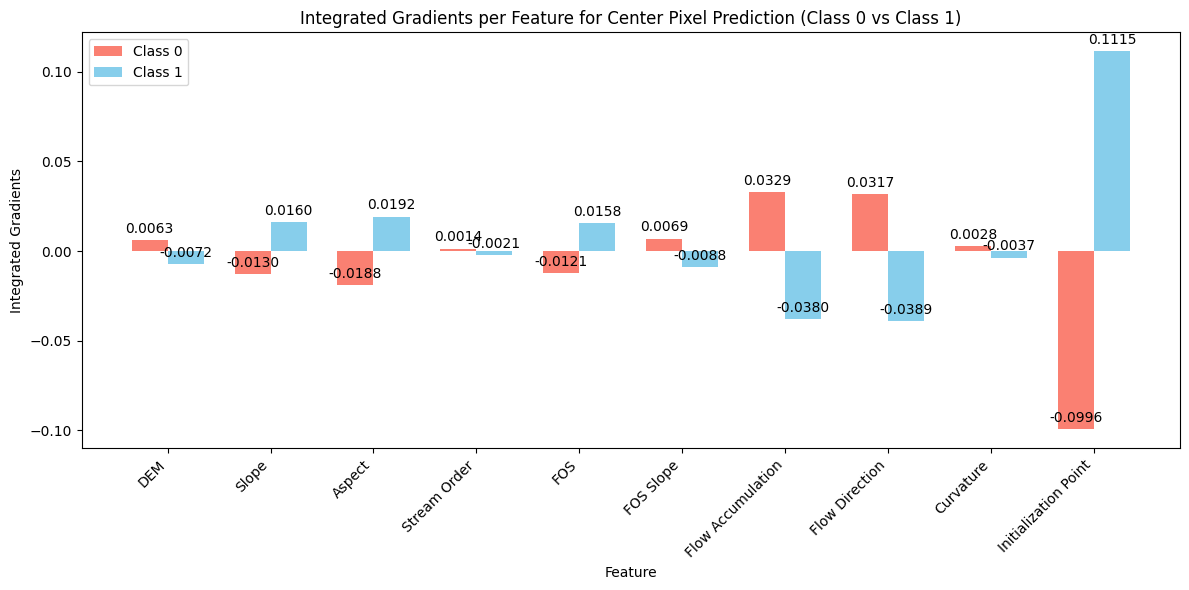

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def integrated_gradients_loop(model, input_image, target_pixel=(128, 128), baseline=None, steps=50):
    """
    Compute Integrated Gradients for both class 0 and class 1 in a loop to reduce memory usage.

    Args:
        model: PyTorch segmentation model (should return a dict with key 'out').
        input_image: Input tensor of shape (1, C, H, W).
        target_pixel: Tuple (row, col) for the pixel of interest.
        baseline: Baseline tensor of same shape as input_image. If None, uses zeros.
        steps: Number of steps for the integration.

    Returns:
        ig_class0: Integrated gradients for class 0 at the target pixel, as a numpy array of shape (C,).
        ig_class1: Integrated gradients for class 1 at the target pixel, as a numpy array of shape (C,).
    """
    model.eval()
    device = input_image.device
    if baseline is None:
        baseline = torch.zeros_like(input_image).to(device)

    # Initialize accumulators for gradients
    total_gradients_class0 = torch.zeros_like(input_image[0, :, target_pixel[0], target_pixel[1]]).to(device)
    total_gradients_class1 = torch.zeros_like(input_image[0, :, target_pixel[0], target_pixel[1]]).to(device)

    # Loop over steps (avoid allocating all scaled inputs at once)
    for i in range(steps + 1):
        alpha = float(i) / steps
        # Interpolate between baseline and input_image
        scaled_input = baseline + alpha * (input_image - baseline)
        # Ensure gradient tracking for scaled_input
        scaled_input.requires_grad = True

        # Forward pass for this scaled input
        output = model(scaled_input)['out']
        target_output_class0 = output[0, 0, target_pixel[0], target_pixel[1]]
        target_output_class1 = output[0, 1, target_pixel[0], target_pixel[1]]

        # Compute gradient of the target output with respect to scaled_input
        grad_class0 = torch.autograd.grad(target_output_class0, scaled_input, retain_graph=True, create_graph=False)[0]
        grad_class1 = torch.autograd.grad(target_output_class1, scaled_input, retain_graph=False, create_graph=False)[0]

        # Accumulate gradients at the target pixel (remove batch dimension)
        total_gradients_class0 += grad_class0[0, :, target_pixel[0], target_pixel[1]]
        total_gradients_class1 += grad_class1[0, :, target_pixel[0], target_pixel[1]]

    # Average gradients over all steps
    avg_gradients_class0 = total_gradients_class0 / (steps + 1)
    avg_gradients_class1 = total_gradients_class1 / (steps + 1)

    # Compute integrated gradients: difference (input - baseline) multiplied by average gradient
    ig_class0 = (input_image[0, :, target_pixel[0], target_pixel[1]] - baseline[0, :, target_pixel[0], target_pixel[1]]) * avg_gradients_class0
    ig_class1 = (input_image[0, :, target_pixel[0], target_pixel[1]] - baseline[0, :, target_pixel[0], target_pixel[1]]) * avg_gradients_class1

    return ig_class0.detach().cpu().numpy(), ig_class1.detach().cpu().numpy()

# ---------------------------
# Compute Integrated Gradients for both classes
# ---------------------------
# Assume `model` is your segmentation model and `inputs` is your input tensor of shape (1, 10, 256, 256)

ig_class0, ig_class1 = integrated_gradients_loop(model, inputs[0:1], target_pixel=(128, 128), baseline=torch.zeros_like(inputs[0:1]), steps=50)

# Define feature names for your 10 channels.
feature_names = [
    "DEM",
    "Slope",
    "Aspect",
    "Stream Order",
    "FOS",
    "FOS Slope",
    "Flow Accumulation",
    "Flow Direction",
    "Curvature",
    "Initialization Point"
]

# Print the IG values per feature for both classes
for i, (val0, val1) in enumerate(zip(ig_class0, ig_class1)):
    print(f"{feature_names[i]} - Class 0: {val0:.4f}, Class 1: {val1:.4f}")

# ---------------------------
# Plot the integrated gradients as a grouped bar chart.
# ---------------------------
x = np.arange(len(feature_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, ig_class0, width, label='Class 0', color='salmon')
rects2 = ax.bar(x + width/2, ig_class1, width, label='Class 1', color='skyblue')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel("Feature")
ax.set_ylabel("Integrated Gradients")
ax.set_title("Integrated Gradients per Feature for Center Pixel Prediction (Class 0 vs Class 1)")
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.legend()

# Add value labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()